Enter category of data ('month', 'week', 'daily', 'intraday'): daily


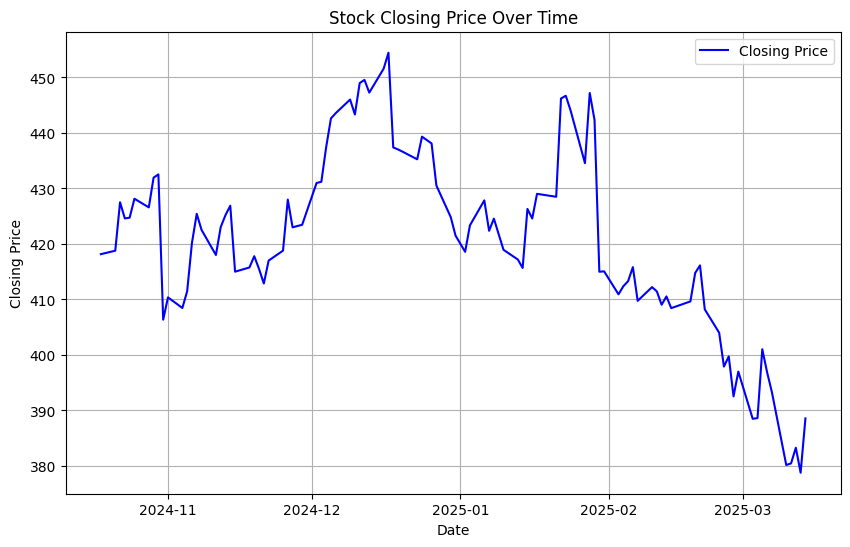

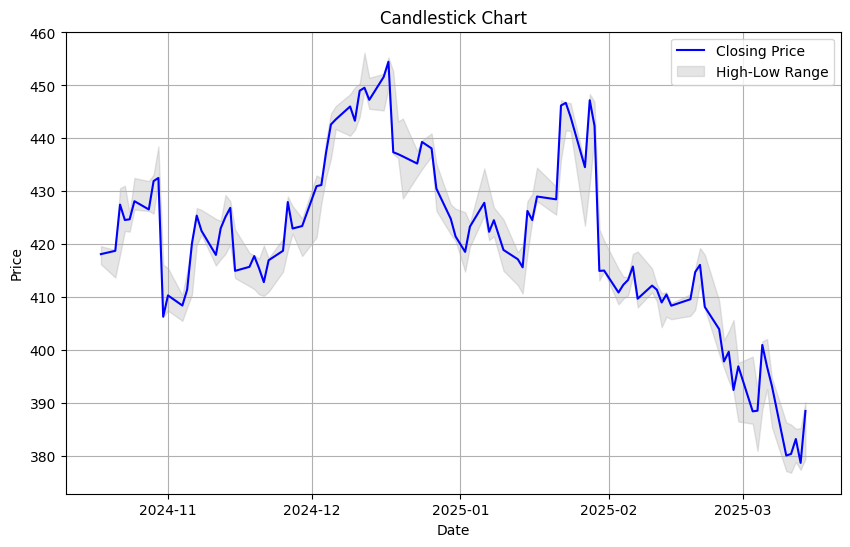

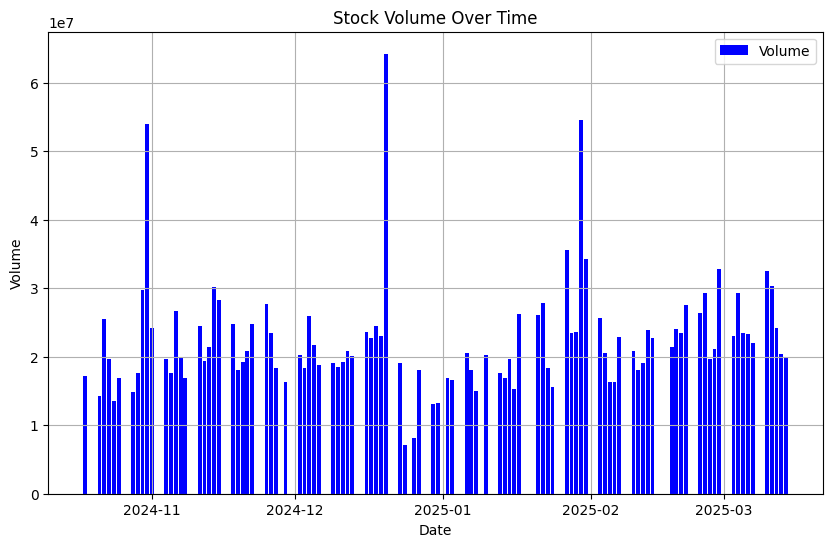

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries

api_key = "TQOVXXPMTMLWKNZY"
ts = TimeSeries(key=api_key, output_format='pandas')
def start():
    event = input("Enter category of data ('month', 'week', 'daily', 'intraday'): ")

    def daily_intraday(df):
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['4. close'], label='Closing Price', color='b')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.title('Stock Closing Price Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['4. close'], label='Closing Price', color='b')
        plt.fill_between(df.index, df['3. low'], df['2. high'], alpha=0.2, label='High-Low Range', color='gray')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Candlestick Chart')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.bar(df.index, df['5. volume'], label='Volume', color='b')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.title('Stock Volume Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    def week_month(df):
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['5. adjusted close'], label='Adjusted Close', color='b')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.title('Stock Closing Price Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['5. adjusted close'], label='Adjusted Close', color='b')
        plt.fill_between(df.index, df['3. low'], df['2. high'], alpha=0.2, label='High-Low Range', color='gray')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Candlestick Chart')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.bar(df.index, df['6. volume'], label='Volume', color='b')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.title('Stock Volume Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        if '7. dividend amount' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.bar(df.index, df['7. dividend amount'], label='Dividend Amount', color='g')
            plt.xlabel('Date')
            plt.ylabel('Dividend Amount')
            plt.title('Dividend Amount Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()

    if event == "week":
        df, meta_data = ts.get_weekly_adjusted('MSFT')
        week_month(df)
    elif event == "month":
        #df, meta_data = ts.get_monthly_adjusted('MSFT',outputsize='compact')
        df, meta_data = ts.get_monthly_adjusted('MSFT')
        week_month(df)
    elif event == "daily":
        df, meta_data = ts.get_daily('MSFT',outputsize='compact')
        daily_intraday(df)
    elif event == "intraday":
        f=input("enter the interval   '5min', '1min' "  )
        df, meta_data = ts.get_intraday('MSFT', interval=f,outputsize='compact')
        daily_intraday(df)
    else:
        print("Enter the category correctly")
        start()
start()

In [9]:
pip install alpha_vantage


In [ ]:
df=ts.get_weekly_adjusted('TSLA')
df[0]
df=ts.get_monthly_adjusted('TSLA')
df[0]
df=ts.get_daily('MSFT',outputsize='full')
df[0]
#1min, 5min, 15min, 30min, 60min
df=ts.get_intraday('TSLA', interval='60min',outputsize='full')
df[0]


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-05 19:00:00,278.3001,279.25,278.2500,278.4800,123652.0
2025-03-05 18:00:00,277.9400,279.55,277.9400,278.3001,130086.0
2025-03-05 17:00:00,279.4000,279.95,277.9300,278.0800,165520.0
2025-03-05 16:00:00,279.2600,402.86,201.5862,279.2950,9160198.0
2025-03-05 15:00:00,276.1900,279.55,273.5200,279.2600,12129063.0
...,...,...,...,...,...
2025-02-04 08:00:00,385.4500,388.30,377.6800,386.0100,1079249.0
2025-02-04 07:00:00,384.0000,386.50,383.9100,385.5200,281316.0
2025-02-04 06:00:00,382.2700,384.68,382.2400,384.0000,128753.0


In [ ]:
DF=ts.get_intraday(symbol="TSLA", interval="5min", outputsize='full')
DF[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-05 19:55:00,278.3515,278.60,278.34,278.4800,29468.0
2025-03-05 19:50:00,278.3400,278.50,278.25,278.3800,16136.0
2025-03-05 19:45:00,278.6204,278.76,278.28,278.3000,10807.0
2025-03-05 19:40:00,278.7900,278.80,278.62,278.6786,7435.0
2025-03-05 19:35:00,278.8350,278.87,278.70,278.7900,4672.0
...,...,...,...,...,...
2025-02-04 04:20:00,381.4100,381.54,380.69,381.2500,20925.0
2025-02-04 04:15:00,381.6700,382.00,381.30,381.5000,17775.0
2025-02-04 04:10:00,380.6600,382.22,380.47,381.7600,28225.0


Metrics for '2. high' Predictions:
MSE: 2.2501888936301224
MAE: 0.9779814436520926
R-squared: 0.9998966982650063


Metrics for '3. low' Predictions:
MSE: 2.7675428987457593
MAE: 1.0161174739175771
R-squared: 0.9998683629507338


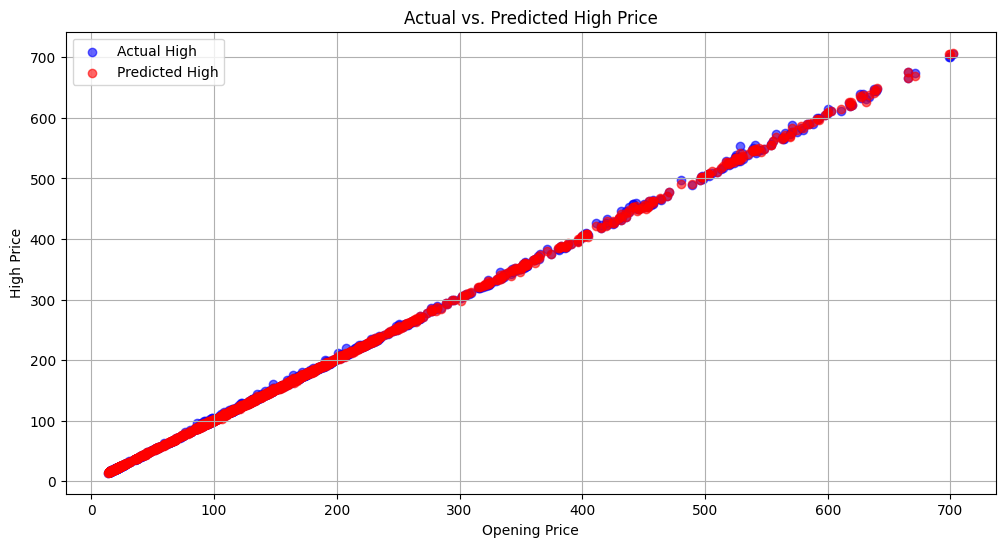

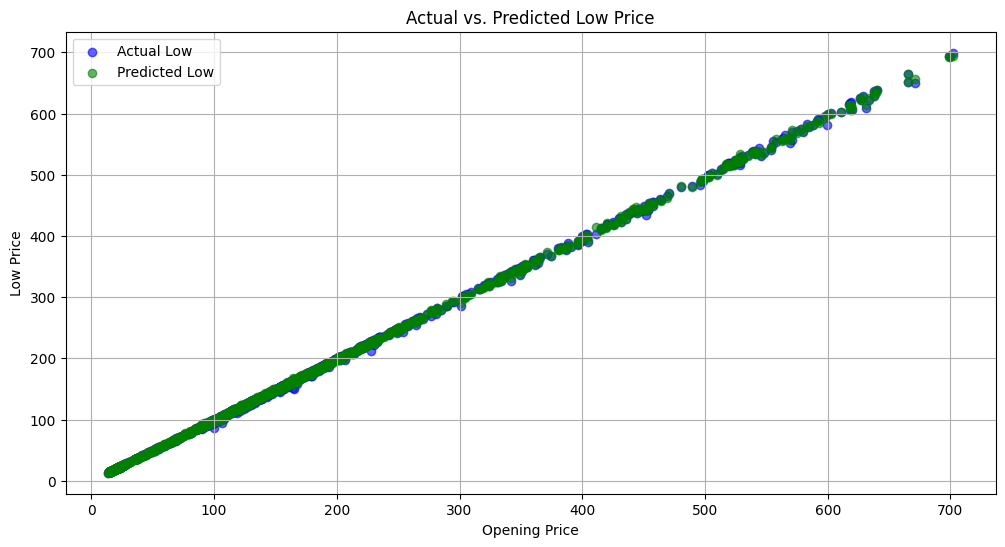

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
api_key =  "TQOVXXPMTMLWKNZY"
symbol = 'AAPL'
ts = TimeSeries(key=api_key, output_format='pandas')
data, _ = ts.get_daily(symbol, outputsize='full')
X = data[['1. open', '4. close']]
y_high = data['2. high']
y_low = data['3. low']
X_train, X_test, y_high_train, y_high_test, y_low_train, y_low_test = train_test_split(
    X, y_high, y_low, test_size=0.2, random_state=42)
model_high = LinearRegression()
model_low = LinearRegression()

model_high.fit(X_train, y_high_train)
model_low.fit(X_train, y_low_train)
y_high_pred = model_high.predict(X_test)
y_low_pred = model_low.predict(X_test)
mse_high = mean_squared_error(y_high_test, y_high_pred)
mae_high = mean_absolute_error(y_high_test, y_high_pred)
r2_high = r2_score(y_high_test, y_high_pred)
mse_low = mean_squared_error(y_low_test, y_low_pred)
mae_low = mean_absolute_error(y_low_test, y_low_pred)
r2_low = r2_score(y_low_test, y_low_pred)
print("Metrics for '2. high' Predictions:")
print(f"MSE: {mse_high}")
print(f"MAE: {mae_high}")
print(f"R-squared: {r2_high}\n")
print("\nMetrics for '3. low' Predictions:")
print(f"MSE: {mse_low}")
print(f"MAE: {mae_low}")
print(f"R-squared: {r2_low}")
plt.figure(figsize=(12, 6))
plt.scatter(X_test['1. open'], y_high_test, color='blue', label='Actual High', alpha=0.6)
plt.scatter(X_test['1. open'], y_high_pred, color='red', label='Predicted High', alpha=0.6)
plt.xlabel('Opening Price')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.scatter(X_test['1. open'], y_low_test, color='blue', label='Actual Low', alpha=0.6)
plt.scatter(X_test['1. open'], y_low_pred, color='green', label='Predicted Low', alpha=0.6)
plt.xlabel('Opening Price')
plt.ylabel('Low Price')
plt.title('Actual vs. Predicted Low Price')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import requests
import pandas as pd

api_key = "TQOVXXPMTMLWKNZY"
symbol = "AAPL"  # Change to "AAPL" for Apple

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=compact&datatype=csv"

df = pd.read_csv(url)
df.to_csv(f"{symbol}_data.csv", index=False)  # Save to CSV for easy access
print(f"Downloaded {symbol} data")
df

Downloaded AAPL data


,timestamp,open,high,low,close,volume
0,2025-03-14,211.250,213.9500,209.58,213.49,60107582
1,2025-03-13,215.950,216.8394,208.42,209.68,61368330
2,2025-03-12,220.140,221.7500,214.91,216.98,62547467
3,2025-03-11,223.805,225.8399,217.45,220.84,76137410
4,2025-03-10,235.540,236.1600,224.22,227.48,71451281
...,...,...,...,...,...,...
95,2024-10-24,229.980,230.8200,228.41,230.57,31109503
96,2024-10-23,234.080,235.1440,227.76,230.76,52286979
97,2024-10-22,233.885,236.2200,232.60,235.86,38846578
98,2024-10-21,234.450,236.8500,234.45,236.48,36254470


In [ ]:
import requests
import pandas as pd

api_key = "TQOVXXPMTMLWKNZY"
symbol = "MSFT"  # Change to "AAPL" for Apple

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=compact&datatype=csv"

df = pd.read_csv(url)
df.to_csv(f"{symbol}_data.csv", index=False)  # Save to CSV for easy access
print(f"Downloaded {symbol} data")
df

Downloaded MSFT data


,timestamp,open,high,low,close,volume
0,2025-03-14,379.775,390.2300,379.5100,388.56,19952846
1,2025-03-13,383.155,385.3200,377.4500,378.77,20473017
2,2025-03-12,382.950,385.2165,378.9507,383.27,24253567
3,2025-03-11,379.000,386.0000,376.9100,380.45,30380177
4,2025-03-10,385.840,386.4000,377.2200,380.16,32569768
...,...,...,...,...,...,...
95,2024-10-24,425.325,425.9782,422.4000,424.73,13581631
96,2024-10-23,430.855,431.0800,422.5300,424.60,19654379
97,2024-10-22,418.490,430.5793,418.0400,427.51,25482197
98,2024-10-21,416.120,418.9600,413.7501,418.78,14206115


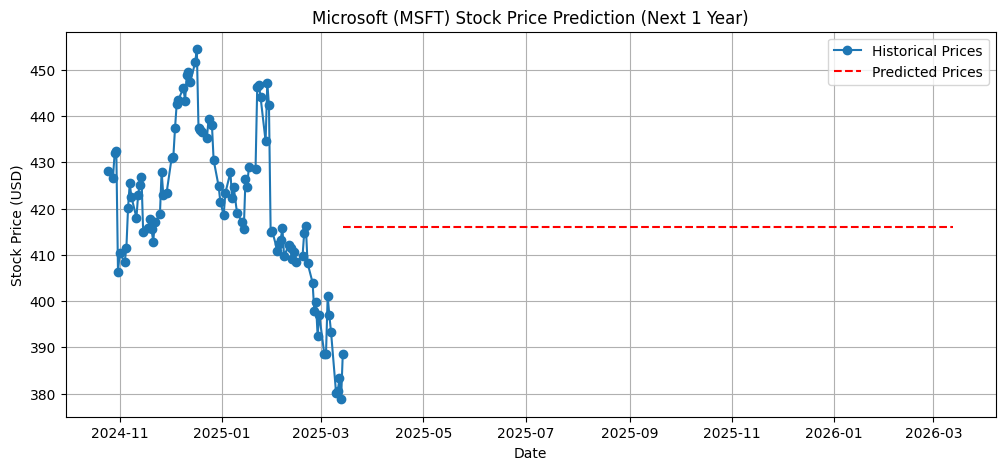

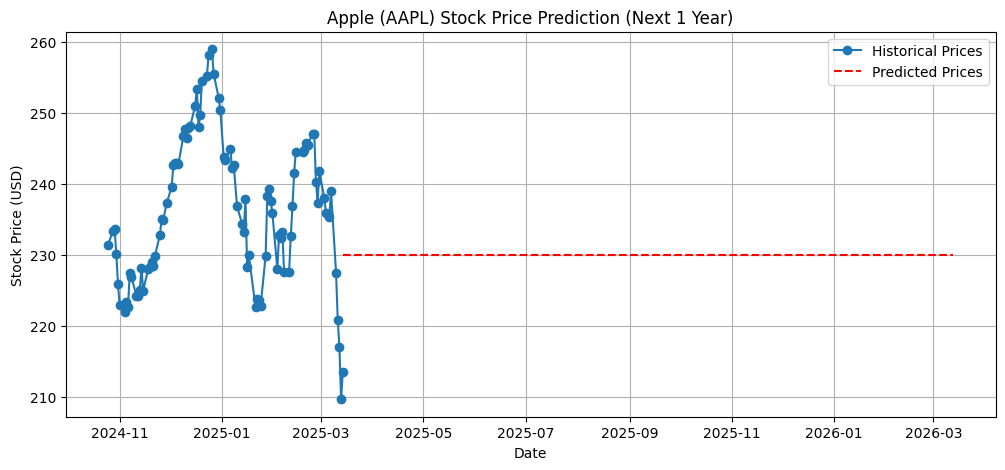

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load datasets
msft_df = pd.read_csv("MSFT_data.csv", parse_dates=["timestamp"])
aapl_df = pd.read_csv("AAPL_data.csv", parse_dates=["timestamp"])

# Function to prepare data for XGBoost
def prepare_data(df):
    df = df.sort_values("timestamp").reset_index(drop=True)
    df["day"] = range(len(df))  # Create a time index

    # Use past closing prices as features
    for i in range(1, 6):  # Lag features (last 5 days)
        df[f"close_lag_{i}"] = df["close"].shift(i)

    df = df.dropna()  # Remove NaN values from shifting
    return df

msft_df = prepare_data(msft_df)
aapl_df = prepare_data(aapl_df)

# Function to train and predict using XGBoost
def train_xgboost(df, stock_name):
    features = ["day"] + [f"close_lag_{i}" for i in range(1, 6)]
    X = df[features]
    y = df["close"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train model
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict future 365 days
    future_days = np.arange(len(df), len(df) + 365)
    future_features = pd.DataFrame({"day": future_days})
    for i in range(1, 6):
        future_features[f"close_lag_{i}"] = df["close"].values[-i]  # Use last known values

    future_preds = model.predict(future_features)

    # Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(df["timestamp"], df["close"], label="Historical Prices", marker="o")
    plt.plot(pd.date_range(df["timestamp"].iloc[-1], periods=365, freq="D"), future_preds, label="Predicted Prices", linestyle="dashed", color="red")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{stock_name} Stock Price Prediction (Next 1 Year)")
    plt.legend()
    plt.grid()
    plt.show()

# Run predictions
train_xgboost(msft_df, "Microsoft (MSFT)")
train_xgboost(aapl_df, "Apple (AAPL)")